## 정규표현식(Reqular Expression)
- 정규표현식: 특정한 규칙을 가진 문자열의 집합을 표현하는데 사용하는 형식 언어이다. <위키백과>

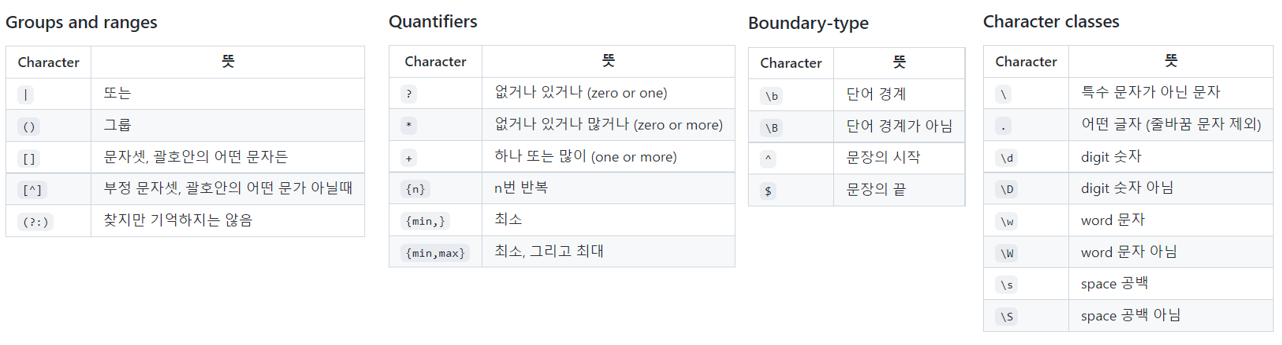


#### 정규표현식 테스트사이트: https://regex101.com/
#### 정규표현식 연습(퀴즈) : https://regexone.com/

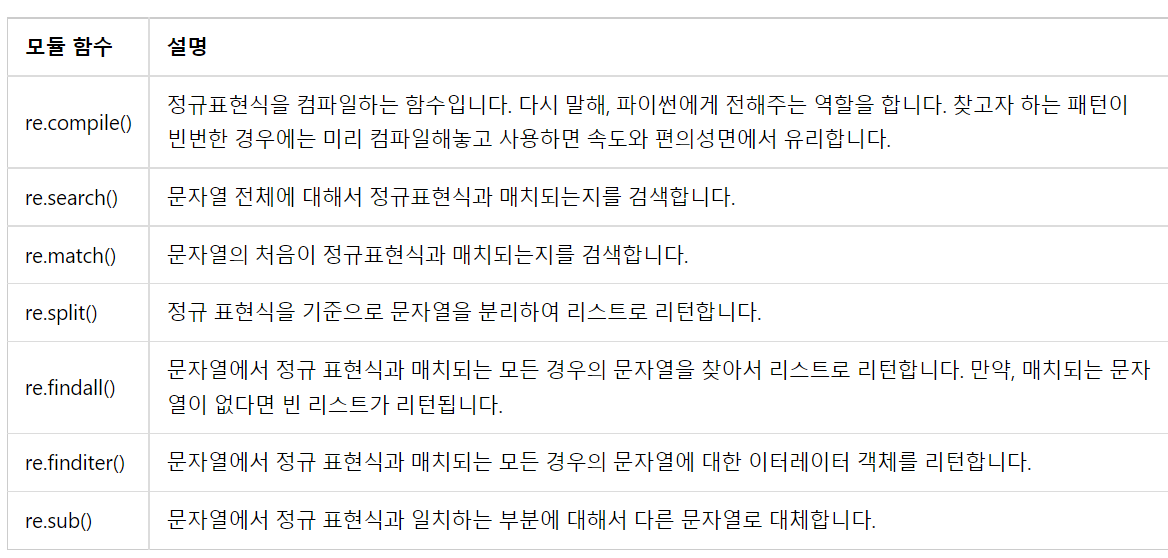

In [1]:
import re

In [58]:
txt='''Hi there, Nice to meet you. And Hello there and hi.
I love grey(gray) color not a gry, graay and graaay.
Ya ya YaYaYa Ya

abcdefghijklmnopqrstuvwxyz
ABSCEFGHIJKLMNOPQRSTUVWZYZ
1234567890

.[]{}()\^$|?*+

010-898-0893
010-405-3412
010 405 3412
010.405.3412
02-878-8888

dream.coder.ellie@gmail.com
hello@daum.net
hello@daum.co.kr

http://www.youtu.be/-ZClicWm0zM
https://www.youtu.be/-ZClicWm0zM
https://youtu.be/-ZClicWm0zM
youtu.be/-ZClicWm0zM

https://regex101.com/

'''

### 1.  탐색기능 (match, search, findall, findinter)
- match : 검색 문자열이 맨 처음일 때 탐색 됨
- search: 문서내에서 탐색 됨. 단 여러개 탐색될 경우 처음 탐색된 정보만 출력
#### 메서드(group, start, end, span)
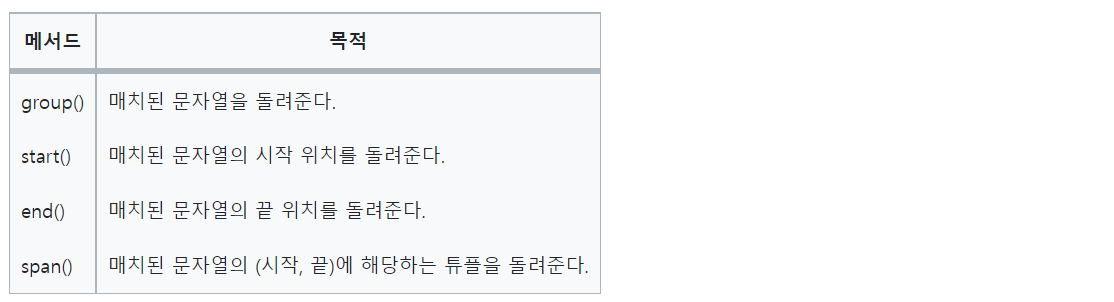

* match()

In [47]:
# match 함수 
import re
mask=re.compile('Hi')
print(mask.match(txt))
print(mask.match(txt).group())
print(mask.match(txt).start())
print(mask.match(txt).end())
print(mask.match(txt).span())

<re.Match object; span=(0, 2), match='Hi'>
Hi
0
2
(0, 2)


* search()

In [54]:
# search 함수
mask=re.compile('Hello')
s=mask.search(txt)
print(s.group())
print(s.start())
print(s.end())
print(s.span())

Hello
32
37
(32, 37)


### 2. 탐색기능 (findall, finditer)
- findall() : 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
- finditer(): 정규 표현식과 매치되는 모든 문자열들을 찾아 iterator 객체로 변환
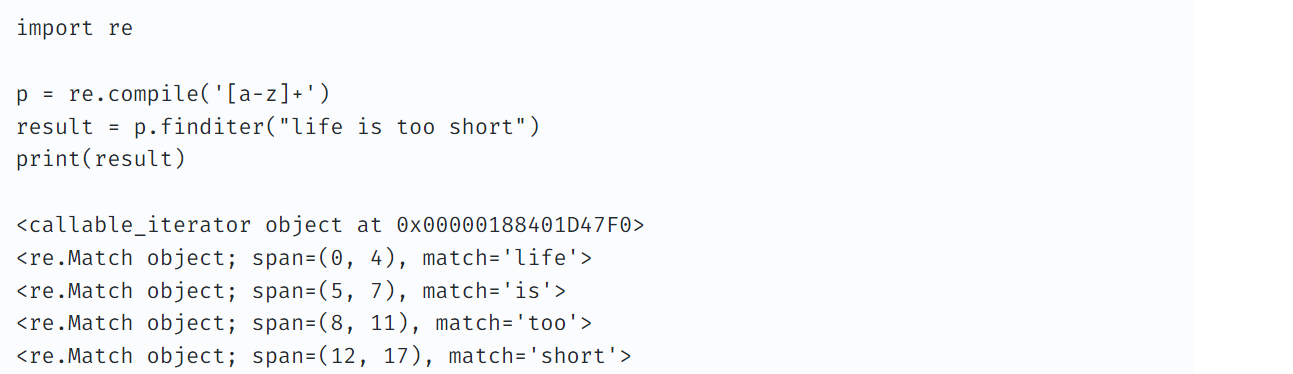

* 전화번호 찾기

#전화번호 찾기
mask=re.compile('\d{2,3}[ .-]\d{3}[ .-]\d{4}')
mask.findall(txt)

* 메일 주소 찾기

In [111]:
#메일 주소 찾기(1) -findall()
m=re.compile('[a-z0-9_+.-]+@([a-z0-9-]+\.)+[a-z0-9]{2,4}')
print(m.findall(txt))

['gmail.', 'daum.', 'co.']


In [112]:
#메일 주소 찾기(2) -findall()
m=re.compile('[a-z0-9_+.-]+@(?:[a-z0-9-]+\.)+[a-z0-9]{2,4}')
print(m.findall(txt))

['dream.coder.ellie@gmail.com', 'hello@daum.net', 'hello@daum.co.kr']


In [113]:
#메일 주소 찾기(3) -finditer()
m=re.compile('[a-z0-9_+.-]+@([a-z0-9-]+\.)+[a-z0-9]{2,4}')
print(m.finditer(txt))

In [114]:
#메일 주소 찾기(4) -finditer()
m=re.compile('[a-z0-9_+.-]+@([a-z0-9-]+\.)+[a-z0-9]{2,4}')
for i in m.finditer(txt):
    print(i)

<re.Match object; span=(269, 296), match='dream.coder.ellie@gmail.com'>
<re.Match object; span=(297, 311), match='hello@daum.net'>
<re.Match object; span=(312, 328), match='hello@daum.co.kr'>


In [115]:
#메일 주소 찾기(5) -finditer()
m=re.compile('[a-z0-9_+.-]+@([a-z0-9-]+\.)+[a-z0-9]{2,4}')
for i in m.finditer(txt):
    print(i.group())

dream.coder.ellie@gmail.com
hello@daum.net
hello@daum.co.kr


### 2. 수정 기능 (sub, split)
- sub :특정문자를 찾아 새로운 텍스트로 치환
- split: 특정 문자 기준으로 분리하기

In [116]:
#전화번호 삭제
sample='Email sent from address: bull0330@korea.ac.kr 010-1234-1234'
mask=re.compile('010-\d{4}-\d{4}')
mask.sub('',sample)


'Email sent from address: bull0330@korea.ac.kr '

In [122]:
#split 
sample='hi! hello python! hello hi! hello! hello!'
mask=re.compile('\s*hello\s*')
print(mask.split(sample))
print(mask.split(sample,1))
print(mask.split(sample,2))
print(mask.split(sample,3))

['hi!', 'python!', 'hi!', '!', '!']
['hi!', 'python! hello hi! hello! hello!']
['hi!', 'python!', 'hi! hello! hello!']
['hi!', 'python!', 'hi!', '! hello!']


### 3. 그룹 기능 활용

In [148]:
sample='Kim 010-1234-4567'
mask=re.compile('(\w+)\s+(\d{3})-(\d{4})-(\d{4})')
sh=mask.search(sample)
print(sh.group(0)) #매칭된 모든 패턴 나옴
print(sh.group(1))
print(sh.group(2))
print(sh.group(3))
print(sh.group(3))

Kim 010-1234-4567
Kim
010
1234
1234


In [162]:
sample='Kim 010-1234-4567'
mask=re.compile('(\w+)\s+(\d{3})-(\d{4})-(\d{4})')
print(mask.sub('\g<1> \g<2>-\g<3>-****',sample))
print(mask.sub('\g<1> \g<2>-****-\g<4>',sample))
print(mask.sub('\g<2>-****-\g<4>, \g<1>',sample))


Kim 010-1234-****
Kim 010-****-4567
010-****-4567, Kim


### 4. 전후방 탐색
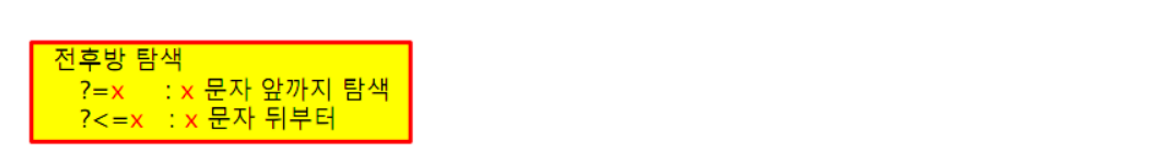

In [4]:
sample='''http://www.google.com
https://www.google.com
ftp://ftp.google.com
'''
mask = re.compile('.+(?=:)')
mask.findall(sample)

['http', 'https', 'ftp']

In [9]:
sample='''AAA: $13.45
BB2: $500.3
CC0: $ .01
D25: $66.99
Total items found: 4
'''
mask = re.compile('(?<=\$)[0-9. ]+')
mask.findall(sample)

['13.45', '500.3', ' .01', '66.99']

### [예]

In [1]:
import re

reg = re.compile("개|애완견|애완 ?동물|반려 ?동물|반려견")

text = """
개는 아주 오래전부터 사람들과 친화적인 관계를 맺어왔다.
그러나 오늘날과 같이 애완동물로서 널리 퍼지게 된 것은 제2차 세계대전 이후이다.
오늘날 애완견 대다수가 집 안에서 사람과 함께 사는 것과 달리
1950년대에서 1960년대까지만 해도 마당에 개의 집을 따로 만들어 키우는 것이 일반적이었다.
1980년대에 들어 애완견의 반려 동물 역할이 더 부각되면서
개를 집안으로 들여 키우는 경우가 많아졌다.
오늘날 반려견은 가족의 일원으로 여겨진다.
반려견에 대한 이러한 시각 변화는 크게 보아 두 종류의 새로운 흐름을 만들어 내었다.
하나는 개를 독립적인 주체로 여기고 개의 개성과 습관등을 파악하며 소통하려는 흐름이고,
다른 하나는 가족의 일원으로서 개다운 개를 기르기 위해 매일 규칙적인 훈련을 시키는 경우이다.""" # '개'에 대한 위키백과 중에서


print(reg.findall(text))

['개', '애완동물', '애완견', '개', '애완견', '반려 동물', '개', '반려견', '반려견', '개', '개', '개', '개', '개']


### 